<a href="https://colab.research.google.com/github/NaraGuimma/DS-with-Python_SoloLearn/blob/main/Classification_SoloLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
iris = pd.read_csv('/content/iris.csv')

In [2]:
iris.shape

(150, 5)

In [3]:
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris.groupby('variety').size()

variety
Setosa        50
Versicolor    50
Virginica     50
dtype: int64

In [6]:
iris['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

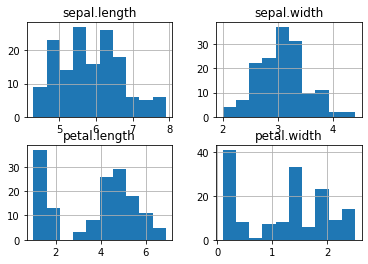

In [7]:
import matplotlib.pyplot as plt
iris.hist()
plt.show()

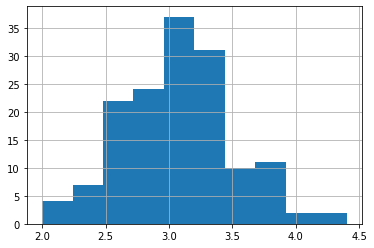

In [8]:
iris['sepal.width'].hist();

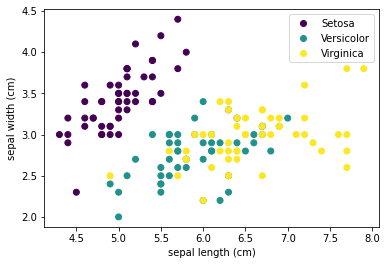

In [9]:
# build a dict mapping species to an integer code
inv_name_dict = {'Setosa': 0, 
  'Versicolor': 1,
  'Virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['variety']] 
# scatter plot
scatter = plt.scatter(iris['sepal.length'], iris['sepal.width'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

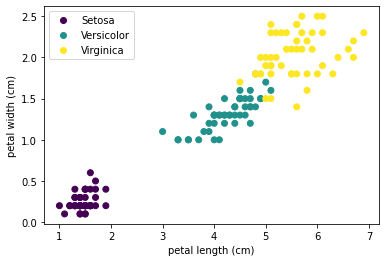

In [10]:
# scatter plot
scatter = plt.scatter(iris['petal.length'], iris['petal.width'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
  labels = inv_name_dict.keys())
plt.show()

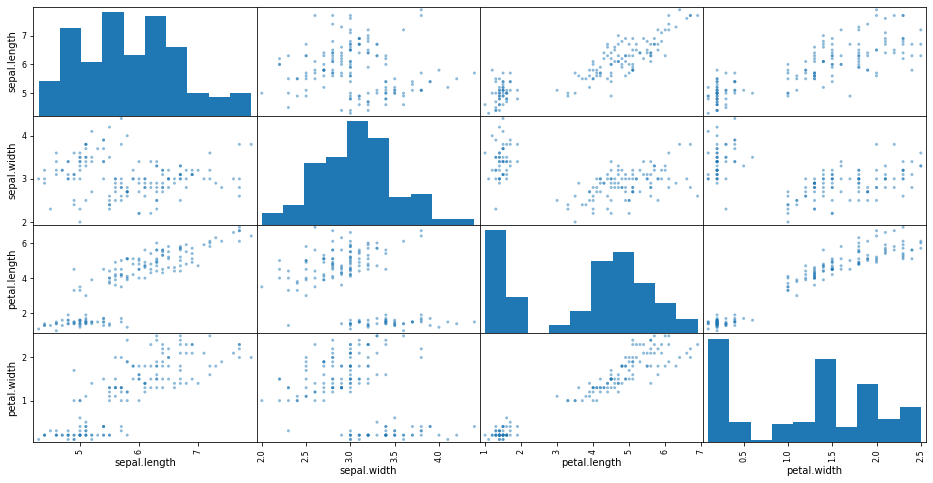

In [11]:
import pandas as pd
pd.plotting.scatter_matrix(iris, figsize=(16,8));

In [12]:
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(iris[['petal.length']], iris['variety'], test_size=0.3, random_state=1) # 70% training and 30% test

In [14]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

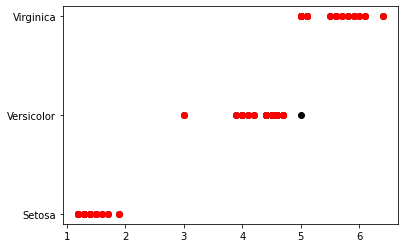

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, color='k')
plt.scatter(X_test, y_pred, color='r')
plt.show();

In [18]:
X = iris[['petal.length', 'petal.width']]
y = iris['variety']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [20]:
y_train.value_counts()

Versicolor    35
Virginica     35
Setosa        35
Name: variety, dtype: int64

In [21]:
y_test.value_counts()

Virginica     15
Setosa        15
Versicolor    15
Name: variety, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier(n_neighbors=5)

In [24]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
pred = knn.predict(X_test)

In [26]:
pred[:5]

array(['Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor'],
      dtype=object)

In [27]:
y_pred_prod = knn.predict_proba(X_test)
y_pred_prod[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

In [28]:
y_pred[10:12]

array(['Versicolor', 'Setosa'], dtype=object)

In [29]:
(y_pred==y_test.values).sum()

10

In [30]:
y_test.size

45

In [31]:
(y_pred==y_test.values).sum()/y_test.size

0.2222222222222222

In [32]:
knn.score(X_test, y_test)

0.9777777777777777

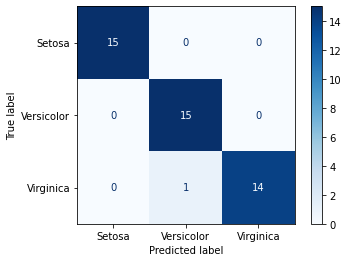

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);

In [34]:
import numpy as np
from sklearn.metrics import confusion_matrix


y_true = np.array(['dog', 'cat', 'cat', 'dog', 'dog'])

y_pred = np.array(['dog', 'cat', 'cat', 'cat', 'dog'])



confusion_matrix(y_true, y_pred, labels=['cat', 'dog'])

array([[2, 0],
       [1, 2]])

In [35]:
from sklearn.model_selection import cross_val_score
# create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)

In [36]:
# train model with 5-fold cv
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [37]:
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


In [38]:
cv_scores.mean()

0.9533333333333334

In [39]:
from sklearn.model_selection import GridSearchCV
# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}
# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
knn_gscv.best_params_

{'n_neighbors': 4}

In [41]:
knn_gscv.best_score_

0.9666666666666668

In [45]:
knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X,y)
y_pred = knn_final.predict(X)
knn_final.score(X,y)

0.9733333333333334

In [42]:
new_data = np.array([3.76, 1.20])

In [46]:
new_data = new_data.reshape(1, -1)


In [49]:
knn_final.predict(new_data)

array(['Versicolor'], dtype=object)

In [50]:
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])

In [51]:
knn_final.predict(new_data)

array(['Versicolor', 'Virginica', 'Setosa'], dtype=object)

In [52]:
knn_final.predict_proba(new_data)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])

In [53]:
iris['variety'].value_counts()

Versicolor    50
Virginica     50
Setosa        50
Name: variety, dtype: int64

In [54]:
import numpy as np

from sklearn.metrics import confusion_matrix 

y_true = np.array(['cat', 'dog', 'dog',

  'cat', 'fish', 'dog', 'fish'])

y_pred = np.array(['cat', 'cat', 'cat',

  'cat', 'fish', 'dog', 'fish'])

confusion_matrix(y_true, y_pred,

  labels=['cat', 'dog', 'fish'])

array([[2, 0, 0],
       [2, 1, 0],
       [0, 0, 2]])